# Data Manipulation to Make viz work

In [1]:
import pandas as pd
import altair as alt
import json
import os

## exploration

In [27]:
files = ['viz_BobPalmer.json',
       'viz_gatsbyjs.json', 
       'viz_getnikola.json',
       'viz_novus.json',
       'viz_OneDrive.json',
       'viz_rathena.json',
       'viz_Tribler.json',
       'viz_waffleio.json'
      ]

In [171]:
def regroupModularity(data, key='modularity'):
    d = pd.DataFrame.from_dict(data[key], orient='index')
    
    d.index = pd.to_datetime(d.index)
    d = d.sort_index().reset_index()
    d.columns =  ['timestamp', 'modularity']
    d.timestamp = d.timestamp.apply(lambda x: (x - pd.Timedelta(x.isoweekday()-1, unit='D')).strftime('%Y-%m-%d'))
    d = d.set_index('timestamp')
    
    return d

In [172]:
def regroupLinkCount(data, key='links'):
    d = pd.DataFrame.from_dict(data[key], orient='columns')
    
    d.timestamp = pd.to_datetime(d.timestamp)
    d_grouped = d.groupby([pd.Grouper(key='timestamp', freq='W-MON')]).count()
    d_grouped = d_grouped.iloc[:,1]
    
    d_grouped.index = d_grouped.index.strftime('%Y-%m-%d')
    
    return d_grouped

In [173]:
def adjustLinkDates(data, key='links'):
    links = pd.DataFrame.from_dict(data[key], orient='columns')
    links.timestamp = pd.to_datetime(links.timestamp)
    links.timestamp = links.timestamp.apply(lambda x: (x - pd.Timedelta(x.isoweekday()-1, unit='D')).strftime('%Y-%m-%d'))
    return links

In [174]:
def fixData(files):
    for file in files:
        with open(os.path.join('./original_data/', file)) as f:
            data = json.load(f)

        data['links'] = adjustLinkDates(data).to_dict(orient='records')

        data['modularity'] = regroupModularity(data).to_dict()['modularity']      
        
        data['no_links'] = regroupLinkCount(data).to_dict()
        
        
        with open(os.path.join('./new_data/', file), 'w') as f:
            json.dump(data, f)

In [175]:
fixData(files)

## some plots

In [41]:
file = 'viz_Tribler.json'
with open(os.path.join('./original_data/', file)) as f:
    data = json.load(f)

### modularity

In [219]:
modularity = pd.DataFrame.from_dict(data['modularity'], orient='index')
modularity.columns = ['modularity']

In [220]:
modChart = alt.Chart(modularity.reset_index()).mark_line().encode(
    alt.Y(shorthand='modularity:Q'),
    alt.X(shorthand='index:T')
)

### Links

In [4]:
links = pd.DataFrame.from_dict(data['links'], orient='columns')

In [6]:
links.timestamp = pd.to_datetime(links.timestamp)

In [7]:
no_links = links.groupby([pd.Grouper(key='timestamp', freq='W-MON')]).count()

In [8]:
linksChart = alt.Chart(no_links.reset_index()).mark_line().encode(
    alt.X('timestamp:T'),
    alt.Y('rel_type:Q')
)

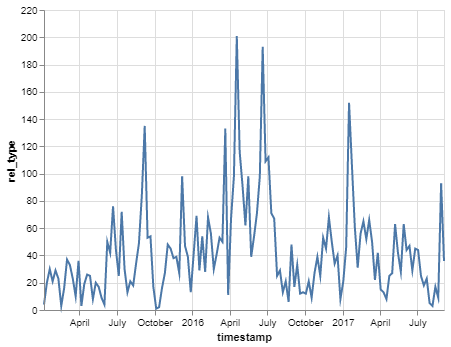

In [9]:
linksChart

In [10]:
links.head()

,timestamp,target,source,rel_type,link_id
0,2016-07-01,925982,960478,ContextualReply,18317343
1,2016-05-27,945185,960478,ContextualReply,18317321
2,2016-07-05,925982,960478,ContextualReply,18317346
3,2016-07-05,925982,960478,ContextualReply,18317344
4,2016-05-26,960478,945185,first_reply,21307105


In [24]:
len(links.loc[links.timestamp == "2016-07-01"])

27

In [19]:
adjusted = adjustLinkDates(data)

In [26]:
len(adjusted.loc[adjusted.timestamp == "2016-06-27"])

99

In [23]:
adjusted.head()

,timestamp,target,source,rel_type,link_id
0,2016-06-27,925982,960478,ContextualReply,18317343
1,2016-05-23,945185,960478,ContextualReply,18317321
2,2016-07-04,925982,960478,ContextualReply,18317346
3,2016-07-04,925982,960478,ContextualReply,18317344
4,2016-05-23,960478,945185,first_reply,21307105


In [158]:
file = 'viz_Tribler.json'
with open(os.path.join('./original_data/', file)) as f:
    data = json.load(f)

In [159]:
test= pd.DataFrame.from_dict(data['modularity'], orient='index').sort_index().reset_index()
test.columns = ['timestamp','modularity']
test.timestamp = pd.to_datetime(test.timestamp)

In [163]:
test.timestamp = test.timestamp.apply(lambda x: x - pd.Timedelta(x.isoweekday()-1, unit='D'))
test.timestamp = test.timestamp.strftime()
test = test.set_index('timestamp')

In [164]:
test.head()

,modularity
timestamp,
2015-01-05,0.180000
2015-01-12,-0.044983
2015-01-19,-0.131380
2015-01-26,-0.011285
2015-02-02,-0.009642


In [108]:
data['modularity']

{'2016-03-04': 0.04060807996668054,
 '2017-02-24': 0.15928460743801645,
 '2017-06-23': 0.22502162629757788,
 '2016-07-15': -0.04043216752060596,
 '2016-09-30': 0.20064899945916712,
 '2017-02-17': 0.13795835219556363,
 '2016-12-23': 0.07805990874826423,
 '2015-08-14': 0.061983471074380125,
 '2015-02-20': -0.02897923875432523,
 '2017-05-05': 0.23313625369524318,
 '2017-06-09': 0.17586293776769962,
 '2016-01-22': -0.014739229024943318,
 '2017-03-17': 0.16006520951575898,
 '2015-01-30': -0.011284722222222286,
 '2016-05-06': 0.09795918367346937,
 '2017-02-10': 0.17191043083900223,
 '2015-01-09': 0.18,
 '2015-12-04': 0.04110046781020266,
 '2016-04-01': 0.12316345270890725,
 '2017-05-19': 0.20755385487528344,
 '2015-11-20': 0.040939836240655045,
 '2015-04-17': 0.16077003121748182,
 '2017-03-31': 0.1471875,
 '2016-11-25': 0.11246768170066074,
 '2017-06-30': 0.3011998685075608,
 '2016-12-16': 0.07873519778281682,
 '2016-11-04': 0.16033601168736306,
 '2015-05-15': 0.020000000000000018,
 '2015-04

In [165]:
test.to_dict()

{'modularity': {Timestamp('2015-01-05 00:00:00'): 0.18,
  Timestamp('2015-01-12 00:00:00'): -0.04498269896193771,
  Timestamp('2015-01-19 00:00:00'): -0.1313799621928166,
  Timestamp('2015-01-26 00:00:00'): -0.011284722222222286,
  Timestamp('2015-02-02 00:00:00'): -0.009641873278236915,
  Timestamp('2015-02-09 00:00:00'): -0.010802469135802531,
  Timestamp('2015-02-16 00:00:00'): -0.02897923875432523,
  Timestamp('2015-02-23 00:00:00'): 1.3877787807814457e-17,
  Timestamp('2015-03-02 00:00:00'): -0.06897959183673474,
  Timestamp('2015-03-09 00:00:00'): -0.07833333333333338,
  Timestamp('2015-03-16 00:00:00'): -0.06106519742883376,
  Timestamp('2015-03-23 00:00:00'): -0.06751543209876545,
  Timestamp('2015-03-30 00:00:00'): -0.17631172839506176,
  Timestamp('2015-04-06 00:00:00'): -0.00961538461538464,
  Timestamp('2015-04-13 00:00:00'): 0.16077003121748182,
  Timestamp('2015-04-20 00:00:00'): 0.09904844290657441,
  Timestamp('2015-04-27 00:00:00'): 0.04663923182441703,
  Timestamp('20